## Grupo 4

*   Alex Riquelme
*   Camila Aguilar
*   Camila Varas
*   Claudia Araya
*   Fabián Cuevas

## Contexto

Utilizaremos un set de datos de las policias de New York del año 2009 y 2010. (2009_1perc.csv y 2010_1perc.csv) los cuales nos darán información de los procedimientos policiales realizados. Además se le entregará el diccionario de variables para que pueda consultar que significa cada categoría dentro de las variables.

• La variable respuesta **'arstmade'** informa si los **procedimientos policiales han terminado en arresto o no**, y el objetivo será realizar un modelo de Machine Learning para predecir si un futuro procedimiento terminará en arresto.



# 1.- Enliste todas las librerías que utilizará

Nota: Se recomienda ir actualizando la lista conforme las necesidades vaya teniendo durante el desarrollo de la prueba

In [ ]:
#Se importa numpy para cálculo matemático
import numpy as np
#Se importa la librería pandas con el alias pd
import pandas as pd
#Este módulo proporciona funciones para calcular estadísticas matemáticas de datos numéricos (de tipo real).
from scipy.stats import randint
#Matplotlib permite la generación de gráficos
from matplotlib import pyplot as plt
#La función sklearn.model_selection.train_test_split nos permite dividir un dataset en dos bloques, tipicamente bloques destinados al entrenamiento y validación del modelo (llamamos a estos bloques “bloque de entrenamiento” y “bloque de pruebas” para mantener la coherencia con el nombre de la función).
from sklearn.model_selection import train_test_split, RandomizedSearchCV

#Es una biblioteca de python que proporciona acceso a versiones eficaces de muchos algoritmos comunes. También proporciona una API propia y estandarizada
from sklearn.metrics import precision_score, accuracy_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
#El módulo sklearn.ensemble incluye métodos basados en combinaciones de métodos para la clasificación, regresión y detección de anomalías
from sklearn.ensemble import RandomForestClassifier
#Scikit-learn es una librería de código abierto que unifica bajo un único marco los principales algoritmos y funciones, facilitando en gran medida todas las etapas de preprocesado, entrenamiento, optimización y validación de modelos predictivos
from sklearn.linear_model import LogisticRegression


# from sklearn.tree import export_graphviz
from sklearn import metrics
from IPython.display import display
import statsmodels.api as sm
#import funciones as fn
import seaborn as sns
import warnings
# import graphviz # Ya no es necesario.

#suppress warnings
warnings.filterwarnings('ignore')


# 2.- Importación y revisión de los datos

Importe ambos sets. Dado que la fuente de datos proviene de la misma base, tienen las mismas columnas. Consolide ambos sets y reporte una exploración básica de los datos (número de filas/columnas, tipos de datos, estadísticas básicas, casos perdidos)

In [ ]:
#!unzip -x /content/adult.csv.zip #Carga desde Zip

In [ ]:
#Carga de .csv
data_2009 = pd.read_csv("/content/2009_1perc.csv")
data_2010 = pd.read_csv("/content/2010_1perc.csv")

# Importación de bases de entrenamiento y pruebas
df_2009=pd.DataFrame(data_2009)
df_2010=pd.DataFrame(data_2010)
print ('head')
display(df_2009.head(5))
print ('shape 0:N°Filas')#
print(df_2009.shape[0])#filas
print ('shape 1:N°columnas')
print(df_2009.shape[1])#columnas

head


,Unnamed: 0,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,178048,2009,41,1779,4032009,130,A,O,P,1.0,...,,41,G,7,,1013067,0238633,CM,1,20
1,498873,2009,108,5805,10292009,1050,A,O,P,3.0,...,,108,J,,,1012043,0212157,CM,1,14
2,463573,2009,43,8340,10062009,1450,1,O,P,1.0,...,,43,E,,,1017599,0240200,CM,1,20
3,43626,2009,77,932,1232009,1843,A,O,P,5.0,...,,77,J,4,35,1002625,0183442,CM,1,24
4,563921,2009,110,11224,12132009,1655,A,O,P,3.0,...,,110,H,,,1024535,0209890,CM,1,20


shape 0:N°Filas
5812
shape 1:N°columnas
112


# 3.- Preprocesamiento de datos

Habrá notado que los datos parecen tener ciertas inconsistencias. Siga los siguientes pasos para limpiar este set:

In [ ]:

#data_2009.shape[0] devuelve el número de filas en el DataFrame data_2010
data_n_columnas = data_2009.shape[0]
#data_2009.shape[1] devuelve el número de columnas en el DataFrame data_2010
data_n_filas = data_2009.shape[1]
# print('El conjunto de datos tiene', data_n_columnas, 'columnas y',data_n_filas, 'filas' )

data2 = data_2009.dropna() #acá depuramos los datos por si hay valores vacíos.
#data_2010.shape[0] devuelve el número de filas en el DataFrame data_2010
data2_n_columnas = data_2009.shape[0]
#data_2010.shape[1] devuelve el número de columnas en el DataFrame data_2010
data2_n_filas = data_2009.shape[1]

print("El conjunto de datos depurado tiene", data_n_columnas-data2_n_columnas, "columnas menos y", data_n_filas-data2_n_filas, "filas. \n")

data_n_columnas = data_2010.shape[0]
data_n_filas = data_2010.shape[1]
# print('El conjunto de datos tiene', data_n_columnas, 'columnas y',data_n_filas, 'filas' )

data2 = data_2010.dropna() #acá depuramos los datos por si hay valores vacíos.
#devuelve el número de filas en el DataFrame data_2010.
data2_n_columnas = data_2010.shape[0]
#data_2010.shape[0] devuelve el número de filas en el DataFrame data_2010

data2_n_filas = data_2010.shape[1]
data_2010.shape[1]

print("El conjunto de datos depurado tiene", data_n_columnas-data2_n_columnas, "columnas menos y", data_n_filas-data2_n_filas, "filas. \n" )

print("Como tenemos que las dos base de datos tienen mismas dimensiones\n" "y ya estan limpias se procede a la unión de ambas en una nueva. \n")
df_salida = pd.concat([df_2009, df_2010], ignore_index=True)

df_salida.info(verbose=True, show_counts=True)
print('Dimensiones del dataframe final: {}'.format(df_salida.shape))


El conjunto de datos depurado tiene 0 columnas menos y 0 filas. 

El conjunto de datos depurado tiene 0 columnas menos y 0 filas. 

Como tenemos que las dos base de datos tienen mismas dimensiones
y ya estan limpias se procede a la unión de ambas en una nueva. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Data columns (total 112 columns):
 #    Column      Non-Null Count  Dtype  
---   ------      --------------  -----  
 0    Unnamed: 0  11825 non-null  int64  
 1    year        11825 non-null  int64  
 2    pct         11825 non-null  int64  
 3    ser_num     11825 non-null  int64  
 4    datestop    11825 non-null  int64  
 5    timestop    11825 non-null  int64  
 6    recstat     11825 non-null  object 
 7    inout       11825 non-null  object 
 8    trhsloc     11825 non-null  object 
 9    perobs      11825 non-null  float64
 10   crimsusp    11825 non-null  object 
 11   perstop     11825 non-null  int64  
 12   typeofid    11825 non-null  objec

## Paso 3.1

Obtenga una lista con todas las variables categóricas que tengan entre 2 y 99 categorías (inclusive). (hint: son las variables tipo categóricas.

In [ ]:
#En el dataframe df_var_cat Solo estarán las variables categoricas:
df_var_cat = df_salida.select_dtypes(include=['object'])

selected_vars = []
for col in df_var_cat:
  if len(df_var_cat[col].unique()) >= 2 and len(df_var_cat[col].unique()) <= 99:
    selected_vars.append(col)

# En este dataframe df_var_cat_filtrado se encontrarán las variables categóricas que tengan entre 2 y 99 categorías:
#df_salida: vienen los df concatenados 2009 y 2010
df_var_cat_filtrado = df_salida[selected_vars]

print("\n\n*** Lista de variables categoricas que tengan entre 2 y 99 categorías. \n ***")
df_var_cat_filtrado.info()



*** Lista de variables categoricas que tengan entre 2 y 99 categorías. 
 ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Data columns (total 74 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   recstat   11825 non-null  object
 1   inout     11825 non-null  object
 2   trhsloc   11825 non-null  object
 3   typeofid  11825 non-null  object
 4   explnstp  11825 non-null  object
 5   othpers   11825 non-null  object
 6   arstmade  11825 non-null  object
 7   sumissue  11825 non-null  object
 8   offunif   11825 non-null  object
 9   officrid  11825 non-null  object
 10  frisked   11825 non-null  object
 11  searched  11825 non-null  object
 12  contrabn  11825 non-null  object
 13  pistol    11825 non-null  object
 14  riflshot  11825 non-null  object
 15  asltweap  11825 non-null  object
 16  knifcuti  11825 non-null  object
 17  othrweap  11825 non-null  object
 18  pf_hands  11825 non-null  object
 19  pf_wall  

## Paso 3.2

Reemplace las siguientes clases faltantes:

-Si alguna categoría de las columnas

* officrid(oficial muestra credencial si esta sin uniforme - sin uniforme),
* offshld(placa policial- sin uniforme)
* offverb(declaración verbal- sin uniforme)
  
   es igual a "" cámbielo a 'N' y en caso contrario déjelo como 'Y'

-Si alguna categoría de las columnas
* sector
* trhsloc(si es residente o transeunte autorizado el lugar)
o
* beat(ubicación de la detención) es igual a ""
(o NA, dependiendo de cómo haya categorizado la base de datos),

cámbielo a 'U' y en caso contrario mantenga su valor

Nota, los valores significan {N: No, Y: Yes, U: Unknown}

In [ ]:
print("Muestra filtro de categorias[officrid,offshld,offverb] sin modificar los valores - primeras filas")
print(df_var_cat_filtrado['officrid'].head(10))
print(df_var_cat_filtrado['offshld'].head(10))
print(df_var_cat_filtrado['offverb'].head(10))


# Filtrar columnas de interés
cols = ['officrid', 'offshld', 'offverb'] #ID, Placa, verbal
#df_var_cat_filtrado_copy = df_var_cat_filtrado[cols].copy() #realiza una copia superficial

# Reemplazar valores vacíos por 'N'
df_var_cat_filtrado.loc[df_var_cat_filtrado['officrid'] == "", 'officrid'] = 'N'
df_var_cat_filtrado.loc[df_var_cat_filtrado['offshld'] == "", 'offshld'] = 'N'
df_var_cat_filtrado.loc[df_var_cat_filtrado['offverb'] == "", 'offverb'] = 'N'

# Reemplazar valores no vacíos por 'Y'

df_var_cat_filtrado.loc[df_var_cat_filtrado['officrid'] != "N", 'officrid'] = 'Y'
df_var_cat_filtrado.loc[df_var_cat_filtrado['offshld'] != "N", 'offshld'] = 'Y'
df_var_cat_filtrado.loc[df_var_cat_filtrado['offverb'] != "N", 'offverb'] = 'Y'


print("Muestra filtro de categorias[officrid,offshld,offverb]  con valores modificados- 10 primeras filas")
print(df_var_cat_filtrado['officrid'].head(10))
print(df_var_cat_filtrado['offshld'].head(10))
print(df_var_cat_filtrado['offverb'].head(10))




print("Muestra filtro de categorias[sector,trhsloc,beat] sin modificar los valores - primeras filas")
print(df_var_cat_filtrado['sector'].head (20))
print(df_var_cat_filtrado['trhsloc'].head (20))
print(df_var_cat_filtrado['beat'].head (20))
# Si alguna categoría de las columnas sector, trhsloc o beat es igual a ""
# (o NA, dependiendo de como haya cargado la base de datos),
# cambielo a 'U' y en caso contrario mantenga su valor
# Nota, los valores significan {N: No, Y: Yes, U: Unknown}
#Se utiliza un metodo distinto al que se uso para 'officrid', 'offshld', 'offverb', pero tiene el mismo efecto
df_var_cat_filtrado.loc[:, 'sector'] = df_var_cat_filtrado['sector'].fillna('U').replace(' ', 'U')
df_var_cat_filtrado.loc[:, 'trhsloc'] = df_var_cat_filtrado['trhsloc'].fillna('U').replace('', 'U')
df_var_cat_filtrado.loc[:, 'beat'] = df_var_cat_filtrado['beat'].fillna('U').replace(' ', 'U')
print("Muestra filtro de categorias[sector,trhsloc,beat] con valores modificados - primeras filas")
print(df_var_cat_filtrado['sector'].head (20))
print(df_var_cat_filtrado['trhsloc'].head (20))
print(df_var_cat_filtrado['beat'].head (20))

Muestra filtro de categorias[officrid,offshld,offverb] sin modificar los valores - primeras filas
0     
1     
2     
3     
4     
5    I
6     
7     
8     
9     
Name: officrid, dtype: object
0     
1    S
2    S
3     
4     
5    S
6     
7     
8    S
9     
Name: offshld, dtype: object
0     
1    V
2     
3     
4     
5    V
6     
7     
8     
9     
Name: offverb, dtype: object
Muestra filtro de categorias[officrid,offshld,offverb]  con valores modificados- 10 primeras filas
0    Y
1    Y
2    Y
3    Y
4    Y
5    Y
6    Y
7    Y
8    Y
9    Y
Name: officrid, dtype: object
0    Y
1    Y
2    Y
3    Y
4    Y
5    Y
6    Y
7    Y
8    Y
9    Y
Name: offshld, dtype: object
0    Y
1    Y
2    Y
3    Y
4    Y
5    Y
6    Y
7    Y
8    Y
9    Y
Name: offverb, dtype: object
Muestra filtro de categorias[sector,trhsloc,beat] sin modificar los valores - primeras filas
0     G
1     J
2     E
3     J
4     H
5     F
6     N
7     G
8     B
9     N
10    J
11    B
12    C
13    M
14

## Paso 3.3
Transforme las columnas ht_feet junto con ht_inch en una única columna (de la forma "ht_feet.ht_inch") llamado 'meters' (hint: transforme con
el siguiente cálculo: metros = (pies+pulgadas)*0.3048)

In [ ]:
# NOTA: la fórmula propuesta en el enunciado está incorrecta.
# Debería ser:
# metros = (pies * 12 + pulgadas) * 0.0254
#df_salida['meters'] = (df_salida['ht_feet']*12 + df['ht_inch'])* 0.0254

#df['meters'] = df.apply(lambda x: (x['ht_feet'] * 0.3048) + (x['ht_inch']* 0.0254), axis-1)

#df[['ht_feet', 'ht_inch', 'meters']].head()


In [ ]:
# 1 feet(pies a metros) = 0.3048 m
#1  inch(pulgadas a metros) = 0.0254 m
df_salida['meters'] = df_salida.apply(lambda x: (x['ht_feet'] * 0.3048) + (x['ht_inch'] * 0.0254), axis=1)
display((df_salida['meters']))

0        1.7526
1        1.6510
2        1.9050
3        1.6510
4        1.6764
          ...  
11820    1.7780
11821    1.7018
11822    1.8288
11823    1.8034
11824    1.8542
Name: meters, Length: 11825, dtype: float64

## Paso 3.4

Note que la fecha viene en un formato MMDDAAAA en la columna datestop. Genere 2 nuevas columnas llamadas month y year que solo tenga el mes y el año respectivamente.

In [ ]:
#aqui se realiza la conversión a formato fecha con Panda Datetime
df_salida['datestop'] = pd.to_datetime(df_salida['datestop'], format='%m%d%Y')
df_salida['month'] = df_salida['datestop'].dt.month
df_salida['year'] = df_salida['datestop'].dt.year


print(df_salida['year'].head(5))
print(df_salida['month'].head(5))



0    2009
1    2009
2    2009
3    2009
4    2009
Name: year, dtype: int32
0     4
1    10
2    10
3    12
4    12
Name: month, dtype: int32


## Paso 3.5

 Filtre su DataFrame y solo deje las columnas seleccionadas en
el punto 3.1[df_var_cat_filtrado]
, el mes, el año, los metros y la edad. Luego solo deje
los registros cuyas edades estén entre 18 y 100 años, ambos
inclusive.

In [ ]:
#data_a_filtrar  mes, el año, los metros y la edad con las variables 'month', 'year', 'meters', 'age' respectivamente
data_a_filtrar = df_salida.loc[:,['month', 'year', 'meters', 'age']]
filtro_edades_validas = (data_a_filtrar['age'] >= 18) & (data_a_filtrar['age'] <= 100) # crear filtro de edades válidas
#df_filtrado con las edades entre 18 y 100
df_filtrado = data_a_filtrar[filtro_edades_validas]
 #se concatena las variables categoricas filtradas del punto 3.1 [df_var_cat_filtrado] y también
#se adiciona el dataframe con los filtros de edades entre 18 y 100
df = pd.concat([df_var_cat_filtrado, df_filtrado], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Data columns (total 78 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   recstat   11825 non-null  object 
 1   inout     11825 non-null  object 
 2   trhsloc   11825 non-null  object 
 3   typeofid  11825 non-null  object 
 4   explnstp  11825 non-null  object 
 5   othpers   11825 non-null  object 
 6   arstmade  11825 non-null  object 
 7   sumissue  11825 non-null  object 
 8   offunif   11825 non-null  object 
 9   officrid  11825 non-null  object 
 10  frisked   11825 non-null  object 
 11  searched  11825 non-null  object 
 12  contrabn  11825 non-null  object 
 13  pistol    11825 non-null  object 
 14  riflshot  11825 non-null  object 
 15  asltweap  11825 non-null  object 
 16  knifcuti  11825 non-null  object 
 17  othrweap  11825 non-null  object 
 18  pf_hands  11825 non-null  object 
 19  pf_wall   11825 non-null  object 
 20  pf_grnd   11825 non-null  ob

# 4.- Análisis exploratorio

## Paso 4.1

Estudie la variable respuesta por si sola (arstmade)el arresto fue realizado?(Y/N), puede ayudarse de un gráfico. Comente.

df.info(verbose=True, show_counts=True)

count     11825
unique        2
top           N
freq      11077
Name: arstmade, dtype: object 



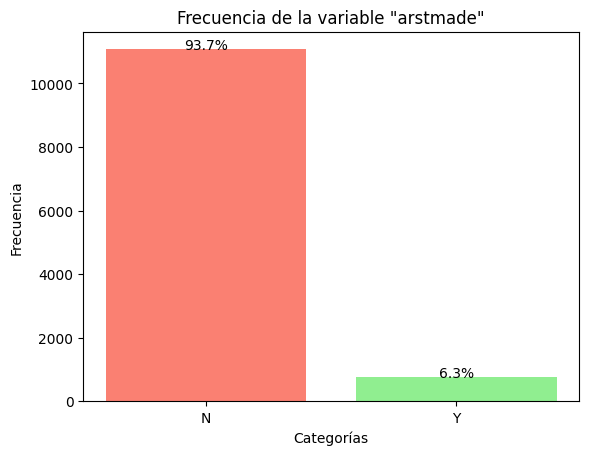

In [ ]:
frecuencias = df['arstmade'].value_counts()

fig, ax = plt.subplots()
ax.bar(frecuencias.index, frecuencias.values, color=['salmon', 'Lightgreen'])

ax.set_title('Frecuencia de la variable "arstmade"')
ax.set_xlabel('Categorías')
ax.set_ylabel('Frecuencia')


print(df['arstmade'].describe(),"\n")

# Calcular los porcentajes de las categorías
total_registros = len(df['arstmade'])
 # Calcular los porcentajes de las categorías
total_registros = len(df['arstmade'])
#porcentaje_N = (frecuencias['N'] / total_registros) * 100
#porcentaje_Y = (frecuencias['Y'] / total_registros) * 100

# Agregar porcentajes sobre las barras
for i, v in enumerate(frecuencias.values):
    ax.text(i, v + 10, f"{v / total_registros * 100:.1f}%", ha='center')

# plt.show()

De acuerdo a lo observado en el gráfico sobre si el Arresto fue realizado?, de un total de 11825 detenciones,   la mayor parte de los arresto no se ejecutaron equivalente a un 93.7% y en caso contrario con un 6.3% que si fueron ejecutados.
count     11825
unique        2
top           N
freq      11077

## Paso 4.2

Estudie la relación de la variable respuesta[arstmade] en comportamiento con la raza [race], comente.

tabla_contingencia


race,A,B,I,P,Q,U,W,Z
arstmade,,,,,,,,
N,340,5936,51,629,2734,75,1040,272
Y,24,395,1,42,188,3,78,17


matriz_frecuencia


race,A,B,I,P,Q,U,W,Z
arstmade,,,,,,,,
N,0.030694,0.535885,0.004604,0.056784,0.246818,0.006771,0.093888,0.024555
Y,0.032086,0.528075,0.001337,0.056150,0.251337,0.004011,0.104278,0.022727


Text(518.4494949494949, 0.5, 'arstmade')

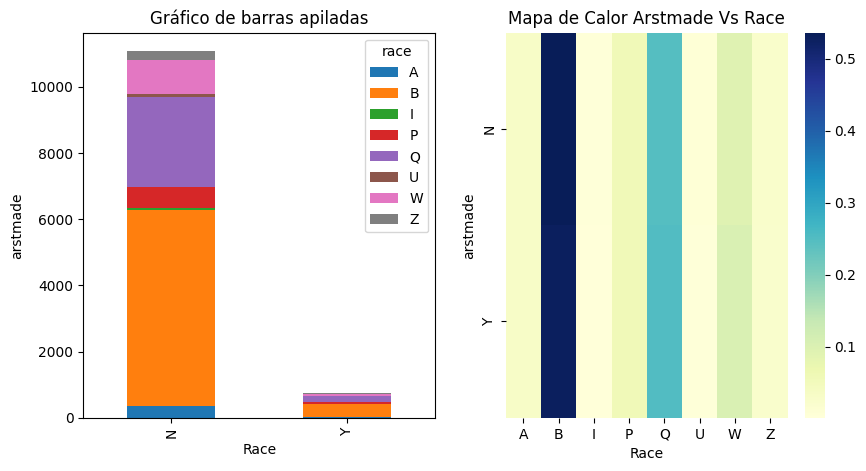

In [ ]:
#se crea una tabla a partir de arstmade(respuesta) y race(raza)
tabla_contingencia = pd.crosstab(df['arstmade'], df['race'])
print('tabla_contingencia')
display(tabla_contingencia)
#Genera una matriz con indice
# si tenemos una tabla cruzada que muestra el número de arrestos (arstmade) por grupo racial (race), y especificamos normalize='index',
#la función calculará la proporción de arrestos para cada grupo racial en relación con el total de arrestos para cada grupo racial.
# Esto proporciona una visión de la distribución de los arrestos dentro de cada grupo racial.

matriz_frecuencia = pd.crosstab(df['arstmade'], df['race'], normalize='index')
print('matriz_frecuencia')
display(matriz_frecuencia)

tabla_contingencia = pd.crosstab(df['arstmade'], df['race'])

fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ax1 = axes[0]
#Se utiliza el grafico de barras apiladas  solo co tabla de contingencia  que viene con los datos en cantidades eventos (proporcion de arrestos por cada grupo racial)
tabla_contingencia.plot(kind='bar', stacked=True, ax=ax1)

ax2 = axes[1]
#Se utiliza el mapa de calor solo con matriz de frecuencia que viene con los datos normalizado (proporcion de arrestos por cada grupo racial)
sns.heatmap(matriz_frecuencia, cmap='YlGnBu', ax=ax2)

# Ajustar los títulos y etiquetas de los subplots
ax1.set_title('Gráfico de barras apiladas')
ax2.set_title('Mapa de Calor Arstmade Vs Race')
ax1.set_xlabel('Race')
ax2.set_xlabel('Race')
ax1.set_ylabel('arstmade')
ax2.set_ylabel('arstmade')

# plt.show()

En cuanto a los control de detención, que no fueron arrestos, se ve en el grafico de barras apiladas, se puede apreciar que la categoria B(Black) seguido de los Q(White hispanic) y W(white).
Para los que si fueron arrestos predomina el B(Black)  y en menor medida (White hispanic).
En el mapa de calor se observa una alta frecuencia proporcional de control de identidad en la raza B(Black) seguido de Q(White hispanic)

## 4.3

 Estudie la relación de la variable respuesta en
comportamiento con el sexo (sex), comente.


Text(518.4494949494949, 0.5, 'arstmade')

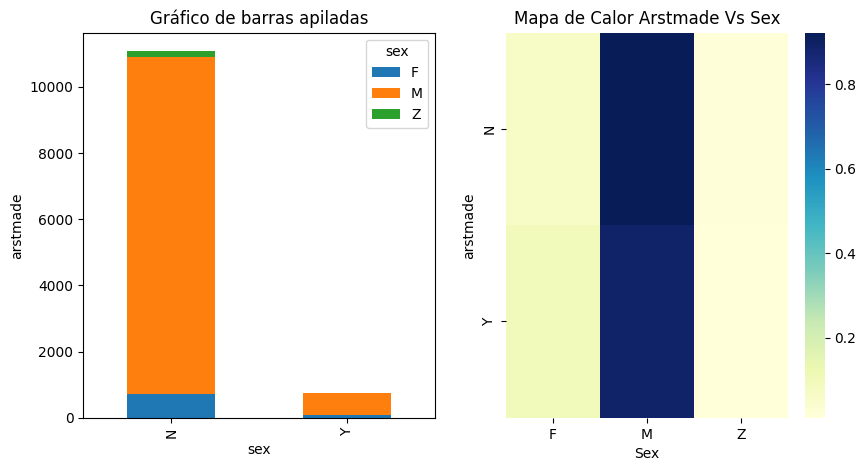

In [ ]:
tabla_contingencia = pd.crosstab(df['arstmade'], df['sex'])
matriz_frecuencia = pd.crosstab(df['arstmade'], df['sex'], normalize='index')

# Crear la figura y los subplots
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

# Crear el stacked bar plot en el primer subplot
ax1 = axes[0]
tabla_contingencia.plot(kind='bar', stacked=True, ax=ax1)

# Crear el heatmap en el segundo subplot
ax2 = axes[1]
sns.heatmap(matriz_frecuencia, cmap='YlGnBu', ax=ax2)

# Ajustar los títulos y etiquetas de los subplots
ax1.set_title('Gráfico de barras apiladas')
ax2.set_title('Mapa de Calor Arstmade Vs Sex')
ax1.set_xlabel('sex')
ax2.set_xlabel('Sex')
ax1.set_ylabel('arstmade')
ax2.set_ylabel('arstmade')
# plt.show()

En cuanto a los control de detención, que no fueron arrestos, se ve en el grafico de barras apiladas, se puede apreciar que la categoria M(Male) es muy superior que el resto de los generos.
 Para los que si fueron arrestos predomina tambien  la categoria M(Male) es muy superior que el resto de los generos.

 En el mapa de calor se observa una alta frecuencia proporcional de control de identidad en el genero  M(Male) por sobre  F(Female)y Z(Unknown)

## 4.3

Estudie la relación de la variable respuesta en comportamiento con el sexo y la edad en su conjunto, comente.

Text(95.72222222222221, 0.5, 'arstmade')

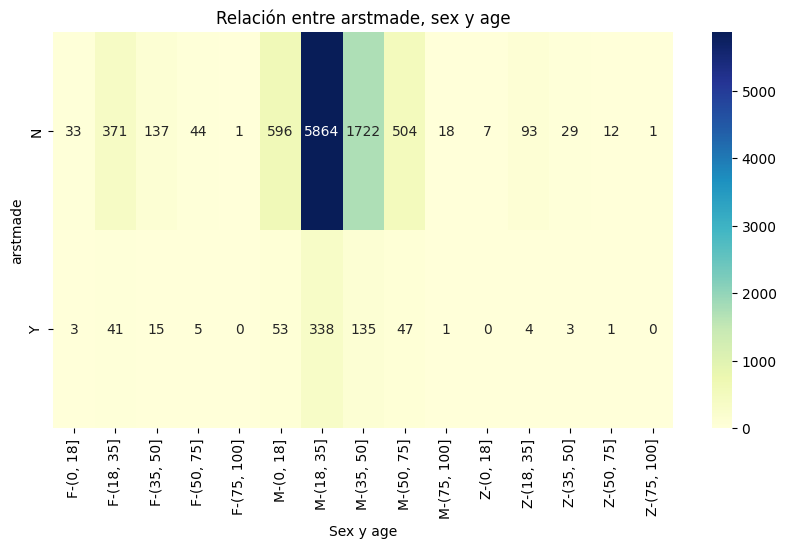

In [ ]:
tabla_contingencia = pd.crosstab(index=df['arstmade'], columns=[df['sex'], pd.cut(df['age'], bins=[0, 18, 35, 50, 75, 100])])

fig, axes = plt.subplots(ncols=1, figsize=(10,6))
bottom_distance = 0.22
sns.heatmap(tabla_contingencia, cmap='YlGnBu', annot=True, fmt='d' )

plt.subplots_adjust(bottom=bottom_distance)
plt.title('Relación entre arstmade, sex y age')
plt.xlabel('Sex y age')
plt.ylabel('arstmade')
# plt.show()

los procedimientos tanto que si fueron arrestos y no, tiene mayor frecuencia son para  las personas de género masculino entre 18 y 35 , luego entre 0 a 18 y por último entre 35 y 50.


## 4.4

Recodifique la variable respuesta a 1 y 0. Donde 0 es N y 1 es
Y

In [ ]:
df['arstmade'] = df['arstmade'].replace({'Y': 1, 'N': 0})
print(df['arstmade'].head(50))

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    1
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    1
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    1
43    0
44    0
45    0
46    0
47    0
48    0
49    0
Name: arstmade, dtype: int64


Tal como se puede apreciar cambiaron las variables a ceros y unos, este último con pocos casos como se puede apreciar en el listado con 3 de 50 en el display.

## 4.5

Muestre en un gráfico la probabilidad que un individuo sea
arrestado, condicional al género y a la raza. ¿qué implicancias
éticas tienen algunas conclusiones de lo que observa?.

Text(70.72222222222221, 0.5, 'Raza')

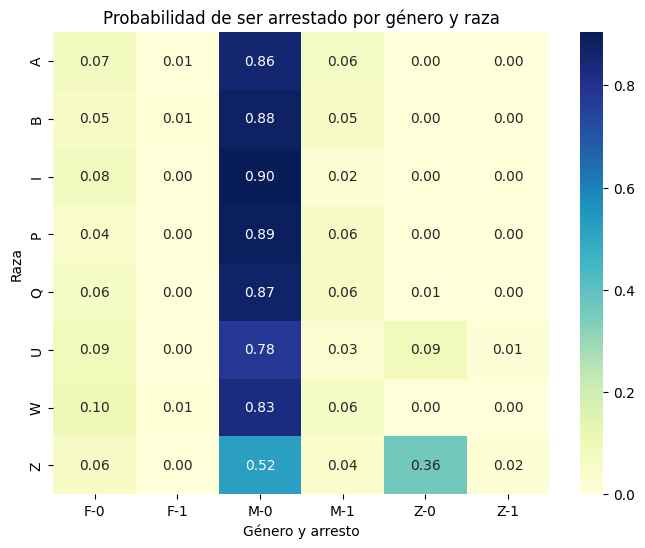

In [ ]:
tabla_contingencia = pd.crosstab(index=df['race'], columns=[df['sex'], df['arstmade']], normalize='index')
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_contingencia, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Probabilidad de ser arrestado por género y raza')
plt.xlabel('Género y arresto')
plt.ylabel('Raza')
# plt.show()

El gráfico anterior indica el porcentaje de detenciones sin arresto y arrestos de mujeres y varones dentro de la raza. En el caso de las detenciones sin arresto los hombres de todas las razas tienen mayor probabilidad de ser controlados.

Se puede observar que dentro de la raza american indian/alaskan native existe una alta probabilidad (90%) de ser controlado sin arresto en proporción a las mujeres de esa misma raza; igual caso es el de los varones de la raza black-hispanic (89%) y de los varones de la raza black (88%). Respecto a la raza white, es la única que  en la que sobresalen las mujeres detenidas sin arrestos con un 10%.

# 5.- Determinar si el procedimiento policial concluirá en alguna acción violenta.

Los atributos que tienen el prefijo pf (['pf_hands'],['pf_wall'], ['pf_grnd'],
['pf_drwep'], ['pf_ptwep'],['pf_baton'],['pf_hcuff'], ['pf_pepsp'] y
['pf_other']) indican si hubo fuerza fisica utilizada por el oficial al
momento del procedimiento, con la marca 'Y'.

Genere una nueva variable llamada 'violencia' la cual sea 1 si en
cualquiera de las 9 variables pf hubo alguna 'Y', y 0 en otro caso. Luego
indique el porcentaje de casos que terminaron con violencia.

* ['pf_hands']: manos arriba
* ['pf_wall']: contra la pared
* ['pf_grnd']:a suelo
* ['pf_drwep']:arma desenfundada
* ['pf_ptwep']:arma apuntada hacia una persona
* ['pf_baton']: baston
* ['pf_hcuff']: esposas o restricción fisica
* ['pf_pepsp']: gas pimienta
* ['pf_other']: otros


Numero de casos violentos: 24.58%. 



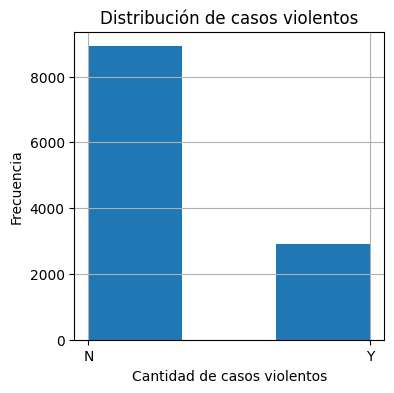

In [ ]:
df["violent"] = 'N'
# print(df_salida["violent"].head(15))
for i, row in df.iterrows():
  if ((row['pf_hands'] == 'Y') | (row['pf_wall'] == 'Y') | (row['pf_grnd'] == 'Y') |
      (row['pf_drwep'] == 'Y') | (row['pf_ptwep'] == 'Y')| (row['pf_baton'] == 'Y') |
      (row['pf_hcuff'] == 'Y') | (row['pf_pepsp']== 'Y' )| (row['pf_other'] == 'Y')):
        df.loc[[i], 'violent'] = 'Y'

# Distribución de la nueva variable
#print(df_salida['violent'].value_counts())

# Gráfico de distribución nueva variable objetivo
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

ax = df['violent']

df["violent"].hist(bins=3)
plt.xlabel('Cantidad de casos violentos')
plt.ylabel('Frecuencia')
plt.title('Distribución de casos violentos')
#conteo
total_casos_estudiados = df['violent'].count()
#df localizando los casos violentos
df_casos_Y = df.loc[df['violent'] == 'Y']
#contabiliza los casos violentos
total_casos_violentos = df_casos_Y['violent'].count()
#calcula el % de casos viol. con respecto al total de casos est. x 100
porcentaje = total_casos_violentos * 100 / total_casos_estudiados

print("Numero de casos violentos: "+str(round(porcentaje, 2))+"%. \n")
# plt.show()

Se puede apreciar que en el primer cuartil del gráfico existe un uso de violencia en los procedimientos.

# 6.- Modelación

## 6.1

 Genere las variables dummies correspondientes (Tenga
cuidado de no utilizar variables que expliquen lo mismo,
¡recuerde que acaba de crear una variable a partir de otras!,
además recuerde que creó una variable numérica que es una
categoría :) ). Luego genere los sets de train-test utilizando el año
2009 para entrenar, y el año 2010 para testear.

In [ ]:
df_categorico2 = df.select_dtypes(include=['object'])
df_numerico2 = df.select_dtypes(include=['int', 'float'])
print(df_categorico2)
print(df_numerico2)

      recstat inout trhsloc typeofid explnstp othpers sumissue offunif  \
0           A     O       P        P        Y       N        N       Y   
1           A     O       P        P        Y       Y        N       N   
2           1     O       P        V        Y       N        N       N   
3           A     O       P        P        Y       N        N       Y   
4           A     O       P        P        Y       Y        N       Y   
...       ...   ...     ...      ...      ...     ...      ...     ...   
11820       1     O       H        P        Y       N        N       Y   
11821       A     O       P        R        Y       N        N       N   
11822       A     O       P        P        Y       N        Y       Y   
11823       1     O       P        P        Y       N        N       N   
11824       1     I       T        P        Y       N        N       Y   

      officrid frisked  ... haircolr eyecolor build addrtyp       city sector  \
0            Y       N  ...   

In [ ]:
#df.info(verbose=True, show_counts=True)
df_categorico = df.select_dtypes(include=['object'])
df_numerico = df.select_dtypes(include=['int', 'float'])
df_dummies = pd.DataFrame()
for col in df_categorico.columns:
    dummies = pd.get_dummies(df_categorico[col], prefix=col, dtype='int64', drop_first=True)
    df_dummies = pd.concat([df_dummies, dummies], axis=1)

df_total = pd.concat([df_numerico, df_dummies], axis=1)


# df_test.info(verbose=True, show_counts=True)
df_train = df_total[df.year == 2009]
print("**** 2009****")
print(df_train.head (30))
# df_train.info(verbose=True, show_counts=True)

df_test = df_total[df.year == 2010]
print("**** 2010****")
print(df_test.head(30))

#####################################################################################################
# Separar los datos en características (X) y la variable objetivo (y)
#X = datos[['tv', 'radio', 'periodico']]  # características
#y = datos['ventas']  # variable objetivo

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba (70/30)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Imprimir el tamaño de los conjuntos de datos
#print("Tamaño del conjunto de entrenamiento:", X_train.shape[0])
#print("Tamaño del conjunto de prueba:", X_test.shape[0])
#####################################################################################################
#divide los datos en conjunto de datos de entrenamiento y conjunto de prueba (80/20)

X_train_2009, X_test_2009, y_train_2009, y_test_2009 = train_test_split(df_train.drop('arstmade', axis = 1),
                                                                        df_train['arstmade'], test_size = 0.2)
x_train_2010, X_test_2010, y_train_2010, y_test_2010 = train_test_split(df_test.drop('arstmade', axis = 1),
                                                                        df_test['arstmade'], test_size = 0.2)

**** 2009****
    arstmade  month    year  meters   age  recstat_A  inout_O  trhsloc_H  \
0          0    4.0  2009.0  1.7526  24.0          1        1          0   
2          0   10.0  2009.0  1.9050  21.0          0        1          0   
3          0   12.0  2009.0  1.6510  22.0          1        1          0   
4          0   12.0  2009.0  1.6764  18.0          1        1          0   
5          0    5.0  2009.0  1.7272  47.0          0        0          0   
6          0   11.0  2009.0  1.8034  20.0          0        1          0   
8          0   12.0  2009.0  1.8542  19.0          1        1          0   
9          0    4.0  2009.0  1.7780  25.0          1        1          0   
10         0   11.0  2009.0  1.7780  19.0          1        1          0   
11         0   12.0  2009.0  1.8288  31.0          0        0          0   
12         1   11.0  2009.0  1.7272  23.0          0        0          0   
13         0    5.0  2009.0  1.7018  18.0          1        1          0  

Tal como se ve arriba se genero un set de datos numericos con los dummies para el año 2009 para datos de entrenamiento y 2010 para datos de test

## 6.2

 Entrene 4 modelos de clásificación y reporte el mejor modelo
bajo algún criterio. Utilice validación cruzada de al menos 2 folds
para probar distintos hiperparámetros para cada modelo (puede
probar cualquier hiperparámetro, pero debe ser al menos uno).

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba

# entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train_2009, y_train_2009)

# hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_2010)

# calcular la matriz de confusión
cm = confusion_matrix(y_test_2010, y_pred)

# calcular la sensibilidad, precisión, exactitud y puntaje F1
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

# imprimir los resultados
print("****** Modelo 1 (Regresión Logistica) ******* \n")
print("Exactitud:", accuracy, "\n")
print("Precisión:", precision, "\n")
print("sensibilidad:", recall, "\n")
print("Puntaje F1:", f1_score, "\n")

****** Modelo 1 (Regresión Logistica) ******* 

Exactitud: 0.9646712463199215 

Precisión: 0.8292682926829268 

sensibilidad: 0.5396825396825397 

Puntaje F1: 0.6538461538461539 



# Regresión Logística V1 (Obsoleto)

Se realizó entrenamiento de modelo por regresión logística, utilizando los datos del año 2009 para entrenamiento y los datos del año 2010 para testeo.
Se calcula la sensibilidad, precisión, exactitud y puntaje F1 a partir de la matriz de confusión y luego se imprimieron los siguientes resultados a fin de compararlos en el futuro:

* Exactitud: 0.9587831207065751
* Precisión: 0.8636363636363636
* sensibilidad: 0.5135135135135135
* Puntaje F1: 0.6440677966101694





SE SELECCIONA LA V2. POR SU ESTRUCTURA Y ORDEN

# **REGRESION LOGISTICA V2** Vigente
1. **Recopilación de datos:** Primero, necesitas recopilar
los datos relevantes para tu análisis. Esto incluye la variable dependiente categórica que deseas predecir y una o más variables independientes que puedan influir en la variable dependiente.

2. **Exploración de datos**: Analiza tus datos para entender su distribución, identificar valores atípicos, y comprender la relación entre las variables independientes y la variable dependiente. Esto puede incluir técnicas de visualización y estadísticas descriptivas.

3. **Preprocesamiento de datos:** Prepara tus datos para el análisis. Esto puede implicar la imputación de valores perdidos, la codificación de variables categóricas, la normalización de variables numéricas, entre otros.

4. **División de datos**: Divide tus datos en un conjunto de entrenamiento y un conjunto de prueba. El conjunto de entrenamiento se utiliza para ajustar el modelo, mientras que el conjunto de prueba se utiliza para evaluar su rendimiento.

5. **Selección de variables (opcional):** Puedes realizar una selección de variables si tienes muchas variables independientes y deseas identificar las más importantes para tu modelo. Esto puede realizarse mediante técnicas como la eliminación hacia atrás, la eliminación hacia adelante, o mediante métodos más avanzados como la regularización.

6. **Ajuste del modelo**: Utiliza el conjunto de entrenamiento para ajustar tu modelo de regresión logística. Esto implica estimar los coeficientes que mejor describen la relación entre las variables independientes y la probabilidad de pertenecer a una categoría específica de la variable dependiente.

7. **Validación del modelo**: Una vez que has ajustado tu modelo, es crucial validar su desempeño. Esto implica evaluar cómo se comporta el modelo en el conjunto de prueba. Métricas comunes para la evaluación de modelos de regresión logística incluyen la precisión, el área bajo la curva ROC (AUC-ROC), la sensibilidad, la especificidad, entre otras.

8. **Interpretación del modelo:** Interpreta los coeficientes estimados para entender cómo cada variable independiente afecta la probabilidad de pertenecer a una categoría específica de la variable dependiente. Esto te permitirá hacer inferencias sobre la relación entre las variables.

9. **Optimización del modelo (opcional)**: En algunos casos, es posible que desees optimizar tu modelo ajustando hiperparámetros o utilizando técnicas como la validación cruzada para mejorar su desempeño.

10. **Despliegue del modelo (opcional)**: Una vez que estés satisfecho con el rendimiento de tu modelo, puedes desplegarlo en un entorno de producción donde pueda ser utilizado para hacer predicciones en datos nuevos.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Seleccionar variables independientes y dependiente
#X_train_2009 = df_train.drop('arstmade', axis=1)
#y_train_2009 = df_train['arstmade']
#X_test_2009 = df_test.drop('arstmade', axis=1)
#y_test_2009 = df_test['arstmade']

# Paso 6: Ajuste del modelo

log_reg_model = LogisticRegression()  # Crear el modelo de regresión logística
log_reg_model.fit(X_train_2009, y_train_2009)  # Ajustar el modelo utilizando el conjunto de entrenamiento del año 2009

# Paso 7: Validación del modelo
y_pred_train_2009 = log_reg_model.predict(X_train_2009)  # Predecir en el conjunto de entrenamiento
accuracy_train_2009 = accuracy_score(y_train_2009, y_pred_train_2009)  # Calcular precisión en el conjunto de entrenamiento
print("Accuracy en el conjunto de entrenamiento (2009):", accuracy_train_2009)

#####PREDECIR CON EL CONJUNTO DE TEST

y_pred_test_2010 = log_reg_model.predict(X_test_2010)  # Predecir en el conjunto de prueba del año 2010
accuracy_test_2010 = accuracy_score(y_test_2010, y_pred_test_2010)  # Calcular precisión en el conjunto de prueba 2010
print("Accuracy en el conjunto de prueba (2010):", accuracy_test_2010)

# Paso 8: Interpretación del modelo
print("Coeficientes del modelo:", log_reg_model.coef_)

# Paso 9: Optimización del modelo (opcional)
# En este paso podrías ajustar hiperparámetros del modelo o realizar técnicas de validación cruzada

# Paso 10: Despliegue del modelo (opcional)
# Una vez satisfecho con el rendimiento del modelo, puedes desplegarlo en un entorno de producción

# Evaluación adicional del modelo
print("Reporte de clasificación en el conjunto de prueba (2010):")
print(classification_report(y_test_2010, y_pred_test_2010))


Accuracy en el conjunto de entrenamiento (2009): 0.9689191898937237
Accuracy en el conjunto de prueba (2010): 0.9656526005888125
Coeficientes del modelo: [[ 3.26834130e-02 -2.17415916e-03 -6.89025631e-02  1.78435826e-02
   3.02994547e-01 -3.05987156e-01 -4.34467077e-03  2.41466054e-01
  -1.64158222e-01  1.27596936e-01 -1.28480442e-01  7.46022781e-02
   3.73940299e-03 -5.07071619e-01 -6.35658701e-01 -6.19888209e-01
   7.93667654e-01  2.24501388e+00  1.97416964e+00  6.70684891e-02
   4.27331042e-02  2.68488983e-02  3.95149447e-01  1.69674984e-01
  -8.50284622e-01 -5.09223737e-01  7.76987545e-02 -8.75275128e-02
  -6.14721297e-02  7.65729712e-02  2.16701904e+00 -3.77921836e-03
  -5.99150591e-02 -5.94788641e-01  6.26046383e-01  1.10875400e-02
  -2.40656509e-01  1.04367276e+00 -1.50949241e-01 -5.19169355e-01
   6.48284237e-01 -1.34307327e-02 -2.13009501e-01 -4.86822939e-02
  -1.01893762e-01 -3.39853109e-01  7.63610030e-01  3.65392274e-01
  -1.10970427e-01 -4.06810274e-01  1.42264620e-01  1.2

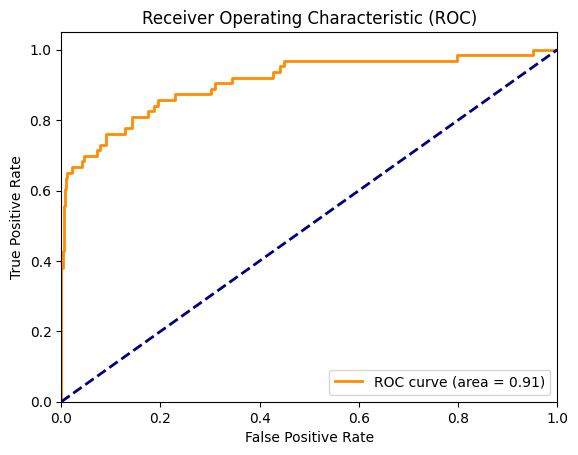

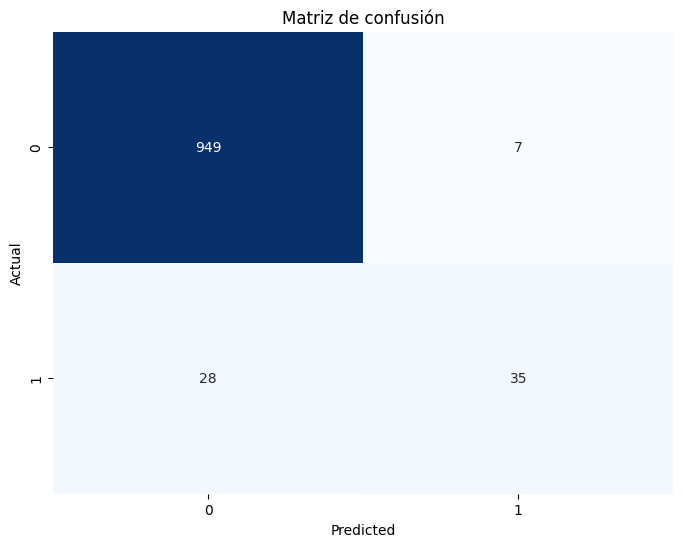

Accuracy: 0.9656526005888125
Precision: 0.8333333333333334
Recall (Sensibilidad): 0.5555555555555556
F1 Score: 0.6666666666666667


In [ ]:
#**COMPARAR RENDIMIENTO
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 7: Validación del modelo

# Calculamos las predicciones de probabilidad en lugar de las clases
y_pred_proba_test_2010 = log_reg_model.predict_proba(X_test_2010)[:, 1]

# Calculamos la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test_2010, y_pred_proba_test_2010)
roc_auc = roc_auc_score(y_test_2010, y_pred_proba_test_2010)

# Visualizamos la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Calculamos la matriz de confusión
conf_matrix = confusion_matrix(y_test_2010, y_pred_test_2010)

# Visualizamos la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de confusión")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Calculamos accuracy, precisión, sensibilidad y puntaje F1
accuracy = accuracy_score(y_test_2010, y_pred_test_2010)
precision = precision_score(y_test_2010, y_pred_test_2010)
recall = recall_score(y_test_2010, y_pred_test_2010)
f1 = f1_score(y_test_2010, y_pred_test_2010)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (Sensibilidad):", recall)
print("F1 Score:", f1)



# 2. RANDOM FOREST v.1 (Obsoleto)


**** Modelo 2 (Random Forest) ***** 

Exactitud base: 1.0 

El mejor hiperparámetro: {'max_depth': 5, 'n_estimators': 53} 

Exactitud: 0.966933867735471 

Precision: 1.0 

Recall: 0.47619047619047616 



<Axes: >

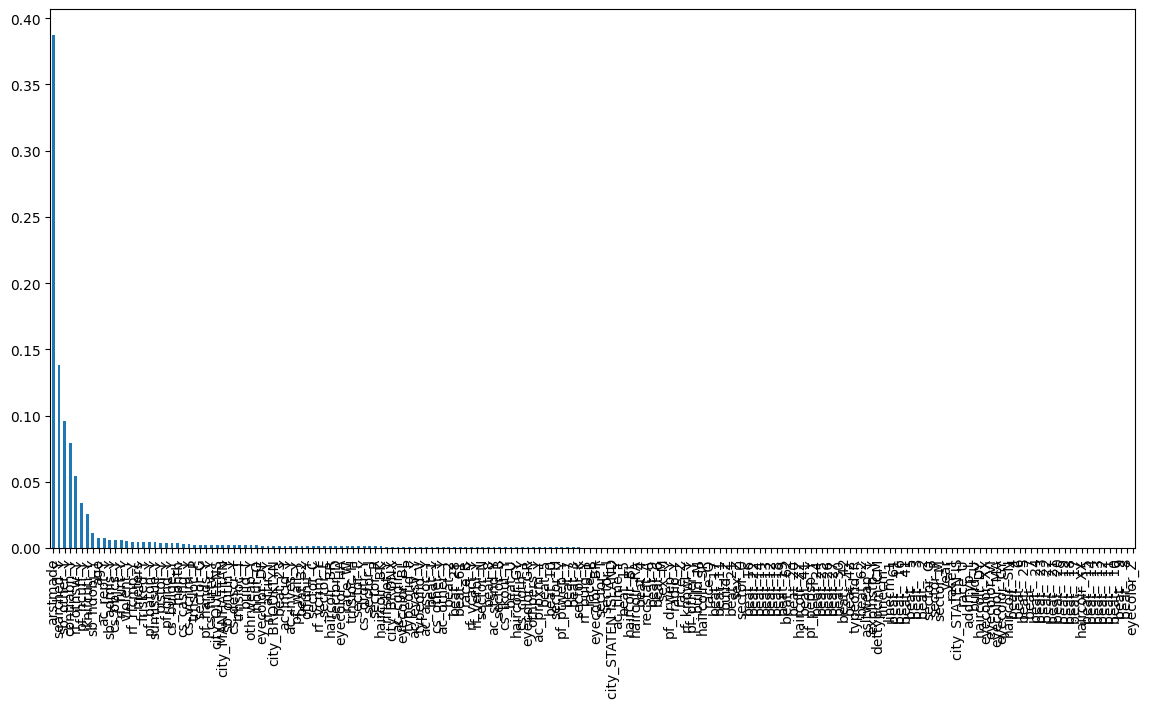

In [ ]:
#Modelo 2 Ramdom Forest
# df_total.info(verbose=True, show_counts=True)
'''
X = df_train.iloc[:,df_train.columns != 'arstmade_Y']
y = df_train.arstmade

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("\n**** Modelo 2 (Random Forest) ***** \n")
print("Exactitud base:", accuracy, "\n")

param_dist = {'n_estimators': randint(1,100),
              'max_depth': randint(1,6)}

# Se crea un Arbol Aleatorio de clasificación
rf = RandomForestClassifier()

# Se aleatoriza para encontrar el mejor hiperparámetro
rand_search = RandomizedSearchCV(rf,
                                    param_distributions = param_dist,
                                    n_iter=5,
                                    cv=5)

# Ajustamos nuevamente el modelo a nuestra base de entrenamiento
rand_search.fit(X_train, y_train)

# Se crea una variable para el mejor modelo
best_rf = rand_search.best_estimator_

# El mejor hiperparámetro
print('El mejor hiperparámetro:', rand_search.best_params_, "\n")

# Predicciones con la data de testeo
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Exactitud:", accuracy, "\n")
print("Precision:", precision, "\n")
print("Recall:", recall, "\n")

# Variables que demuestran la importancia de las variables del modelo
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Grafico de barras
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 7))
feature_importances.plot.bar()
# plt.show()
'''

**RESPUESTA**

Se realizó entrenamiento de modelo por Random Forest, utilizando los datos del año 2009 para entrenamiento y los datos del año 2010 para testeo.
Se calcula la sensibilidad, precisión, exactitud y puntaje F1 a partir de la matriz de confusión y luego se imprimieron los siguientes resultados a fin de compararlos en el futuro:

* Exactitud: 0.9587831207065751
* Precisión: 0.8636363636363636
* sensibilidad: 0.5135135135135135
* Puntaje F1: 0.6440677966101694

SE SELECCIONA V2 POR SU ESTRUCTURA Y ORDEN

# RANDOM FOREST V2

Preparación de datos: Asegúrate de tener tus datos en un formato adecuado para el análisis. Esto implica:

1. Limpieza de datos: Elimina valores atípicos, datos faltantes o corruptos si los hay.
Codificación de variables categóricas: Si tus datos contienen variables categóricas, conviértelas en variables numéricas.
División de datos: Separa tus datos en conjuntos de entrenamiento y prueba.

2. Entrenamiento del modelo:
Importa la biblioteca o paquete necesario para implementar Random Forest.
Crea una instancia de la clase Random Forest Classifier.
Ajusta el modelo a tus datos de entrenamiento.

3. Ajuste de hiperparámetros (opcional): Puedes ajustar los hiperparámetros del modelo para mejorar su rendimiento. Algunos hiperparámetros comunes incluyen el número de árboles (n_estimators), la profundidad máxima de los árboles (max_depth), entre otros.

4. Validación del modelo: Utiliza el modelo entrenado para hacer predicciones en tus datos de prueba.
Evalúa el rendimiento del modelo utilizando métricas como la precisión (accuracy), la sensibilidad (recall), la precisión (precision), el puntaje F1, entre otros.
Analiza el informe de clasificación para entender cómo el modelo clasifica cada clase.
5. Ajuste adicional del modelo (opcional): Si el rendimiento del modelo no es satisfactorio, considera ajustar otros aspectos del modelo, como la selección de características, la ingeniería de características o el ajuste de hiperparámetros adicionales.

6. Despliegue del modelo (opcional): Si el modelo funciona bien y está listo para su implementación, despliégalo en producción para su uso en aplicaciones o sistemas en vivo.

7. Monitorización y mantenimiento (opcional): Una vez que el modelo está en producción, asegúrate de monitorear su rendimiento y realizar ajustes o actualizaciones según sea necesario para mantener su precisión y eficacia a lo largo del tiempo.

Este es un resumen del proceso paso a paso para utilizar Random Forest en la clasificación de datos, sin proporcionar el código específico.


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 6: Ajuste del modelo
rf_model = RandomForestClassifier()  # Crear el modelo de Random Forest
rf_model.fit(X_train_2009, y_train_2009)  # Ajustar el modelo utilizando el conjunto de entrenamiento del año 2009

# Paso 7: Validación del modelo
y_pred_train_2009 = rf_model.predict(X_train_2009)  # Predecir en el conjunto de entrenamiento
accuracy_train_2009 = accuracy_score(y_train_2009, y_pred_train_2009)  # Calcular precisión en el conjunto de entrenamiento
print("Accuracy en el conjunto de entrenamiento (2009):", accuracy_train_2009)
#Accuracy: proporción de predicciones totales correctas(F)

#####PREDECIR CON EL CONJUNTO DE TEST
y_pred_test_2010 = rf_model.predict(X_test_2010)  # Predecir en el conjunto de prueba del año 2010
accuracy_test_2010 = accuracy_score(y_test_2010, y_pred_test_2010)  # Calcular precisión en el conjunto de prueba 2010
print("Accuracy en el conjunto de prueba (2010):", accuracy_test_2010)

# Evaluación adicional del modelo
print("Reporte de clasificación en el conjunto de prueba (2010):")
print(classification_report(y_test_2010, y_pred_test_2010))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test_2010, y_pred_test_2010)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Precisión, Sensibilidad y Puntaje F1
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_2010, y_pred_test_2010, average='binary')
print("Precisión:", precision)
print("Sensibilidad (Recall):", recall)
print("Puntaje F1:", f1_score)

# Curva ROC y Área bajo la curva (AUC)
y_probs = rf_model.predict_proba(X_test_2010)[:, 1]  # Probabilidades de pertenecer a la clase positiva
fpr, tpr, thresholds = roc_curve(y_test_2010, y_probs)
auc_score = roc_auc_score(y_test_2010, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Línea base
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

print("Área bajo la curva (AUC):", auc_score)


# c) SVM - SUPPORT VECTOR MACHINE

Accuracy en el conjunto de entrenamiento (2009): 0.9390415079205935
Accuracy en el conjunto de prueba (2010): 0.9381746810598626
Reporte de clasificación en el conjunto de prueba (2010):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       956
           1       0.00      0.00      0.00        63

    accuracy                           0.94      1019
   macro avg       0.47      0.50      0.48      1019
weighted avg       0.88      0.94      0.91      1019



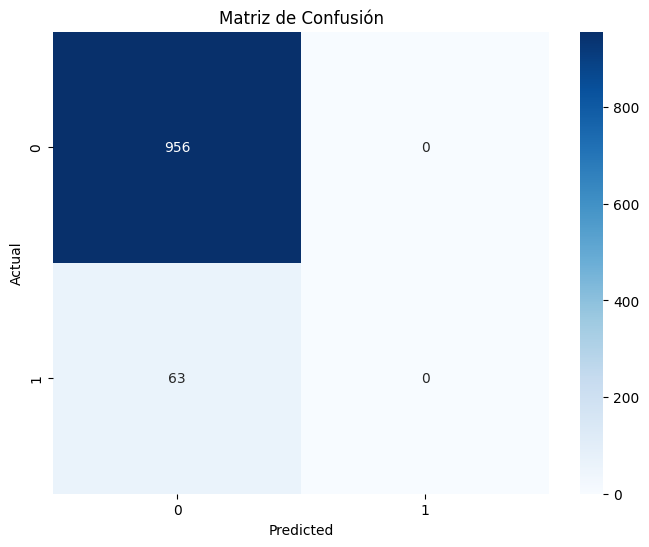

Precisión: 0.0
Sensibilidad (Recall): 0.0
Puntaje F1: 0.0


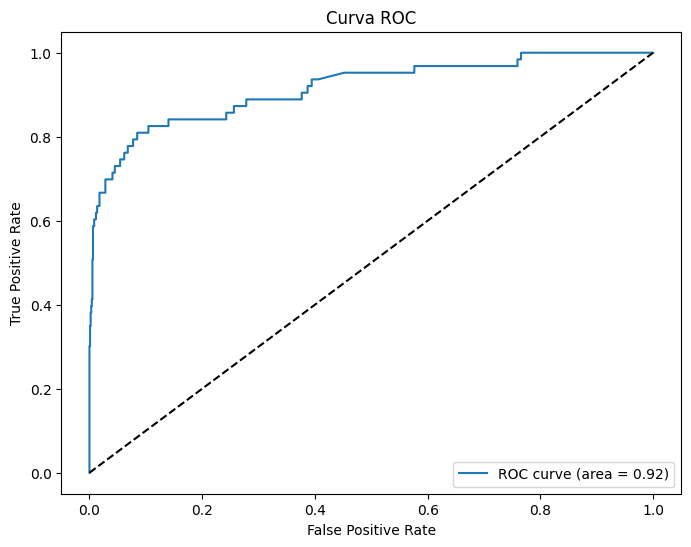

'\n# Predecir en el conjunto de prueba\n#y_pred = svm_classifier.predict(X_test_2010)\n\n# Predecir en el conjunto de prueba\n#y_pred = svm_classifier.predict(X_test_2010)\n\n# Calcular la precisión del modelo\naccuracy = accuracy_score(y_test, y_pred)\nprecision = precision_score(y_test, y_pred)\nrecall = recall_score(y_test, y_pred)\n\nprint("\n**** Modelo 2 (SVM) ***** \n")\nprint("Exactitud base:", accuracy, "\n")\n\n# Definir la distribución de hiperparámetros para la búsqueda aleatoria\nparam_dist = {\'C\': [0.1, 1, 10, 100, 1000],\n              \'gamma\': [1, 0.1, 0.01, 0.001, 0.0001],\n              \'kernel\': [\'linear\', \'rbf\', \'poly\', \'sigmoid\']}\n\n# Crear un clasificador SVM\nsvm = SVC()\n\n# Realizar una búsqueda aleatoria de hiperparámetros\nrand_search = RandomizedSearchCV(svm,\n                                 param_distributions=param_dist,\n                                 n_iter=5,\n                                 cv=5)\n\n# Entrenar el modelo SVM con la bú

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Suponiendo que df_train contiene tus datos de entrenamiento

# Definir el clasificador SVM

svm_classifier = SVC(probability=True)  # Cambiar probability a True

# Entrenar el clasificador SVM
svm_classifier.fit(X_train_2009, y_train_2009)

########################################################
# Paso 7: Validación del modelo
y_pred_train_2009 = svm_classifier.predict(X_train_2009)  # Predecir en el conjunto de entrenamiento
accuracy_train_2009 = accuracy_score(y_train_2009, y_pred_train_2009)  # Calcular precisión en el conjunto de entrenamiento
print("Accuracy en el conjunto de entrenamiento (2009):", accuracy_train_2009)
#Accuracy: proporción de predicciones totales correctas(F)

#####PREDECIR CON EL CONJUNTO DE TEST
y_pred_test_2010 = svm_classifier.predict(X_test_2010)  # Predecir en el conjunto de prueba del año 2010
accuracy_test_2010 = accuracy_score(y_test_2010, y_pred_test_2010)  # Calcular precisión en el conjunto de prueba 2010
print("Accuracy en el conjunto de prueba (2010):", accuracy_test_2010)
#######################################################
#######################################################

# Evaluación adicional del modelo
print("Reporte de clasificación en el conjunto de prueba (2010):")
print(classification_report(y_test_2010, y_pred_test_2010))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test_2010, y_pred_test_2010)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Precisión, Sensibilidad y Puntaje F1
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_2010, y_pred_test_2010, average='binary')
print("Precisión:", precision)
print("Sensibilidad (Recall):", recall)
print("Puntaje F1:", f1_score)

# Curva ROC y Área bajo la curva (AUC)
# Curva ROC y Área bajo la curva (AUC)

y_probs = svm_classifier.predict_proba(X_test_2010)[:, 1]  # Probabilidades de pertenecer a la clase positiva
fpr, tpr, thresholds = roc_curve(y_test_2010, y_probs)
auc_score = roc_auc_score(y_test_2010, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Línea base
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
####################################################
'''
# Predecir en el conjunto de prueba
#y_pred = svm_classifier.predict(X_test_2010)

# Predecir en el conjunto de prueba
#y_pred = svm_classifier.predict(X_test_2010)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("\n**** Modelo 2 (SVM) ***** \n")
print("Exactitud base:", accuracy, "\n")

# Definir la distribución de hiperparámetros para la búsqueda aleatoria
param_dist = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Crear un clasificador SVM
svm = SVC()

# Realizar una búsqueda aleatoria de hiperparámetros
rand_search = RandomizedSearchCV(svm,
                                 param_distributions=param_dist,
                                 n_iter=5,
                                 cv=5)

# Entrenar el modelo SVM con la búsqueda aleatoria de hiperparámetros
rand_search.fit(X_train, y_train)

# Obtener el mejor modelo y sus hiperparámetros
best_svm = rand_search.best_estimator_
best_params = rand_search.best_params_

print('El mejor hiperparámetro:', best_params, "\n")

# Predecir en el conjunto de prueba con el mejor modelo
y_pred = best_svm.predict(X_test)

# Calcular métricas de evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Exactitud:", accuracy, "\n")
print("Precision:", precision, "\n")
print("Recall:", recall, "\n")

'''

# d) Naive Bayes

1. Preparación de datos: En primer lugar, debes preparar tus datos para el entrenamiento del modelo. Esto implica la limpieza de datos, la eliminación de valores atípicos y la división de los datos en conjuntos de entrenamiento y prueba.

2. Entrenamiento del modelo: Durante esta etapa, el modelo Naive Bayes Regressor aprenderá de los datos de entrenamiento. El algoritmo calculará la probabilidad condicional de que una característica dada esté asociada con un valor específico de la variable objetivo.

3. Cálculo de las probabilidades condicionales: Naive Bayes asume independencia entre las características, por lo que para cada característica en el conjunto de datos, el modelo calcula la probabilidad condicional de que esa característica esté asociada con un valor específico de la variable objetivo.

4. Predicción: Una vez que el modelo está entrenado y ha calculado todas las probabilidades condicionales, puede realizar predicciones sobre nuevos datos. Dado un conjunto de características para un nuevo ejemplo, el modelo calcula la probabilidad de que el ejemplo pertenezca a cada posible valor de la variable objetivo.

5. Evaluación del modelo: Después de hacer predicciones sobre el conjunto de prueba, es importante evaluar el rendimiento del modelo. Esto se hace utilizando métricas como el error cuadrático medio (MSE), el coeficiente de determinación (R-cuadrado) u otras métricas específicas según el problema que estés abordando.

5. Ajuste del modelo (opcional): Dependiendo de los resultados de la evaluación, es posible que desees ajustar los parámetros del modelo o incluso considerar la ingeniería de características para mejorar el rendimiento.



Accuracy en el conjunto de entrenamiento: 0.9608983356727492
Accuracy en el conjunto de prueba: 0.8694798822374877
Reporte de clasificación en el conjunto de prueba (2010):
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       956
           1       0.29      0.78      0.42        63

    accuracy                           0.87      1019
   macro avg       0.64      0.83      0.68      1019
weighted avg       0.94      0.87      0.90      1019



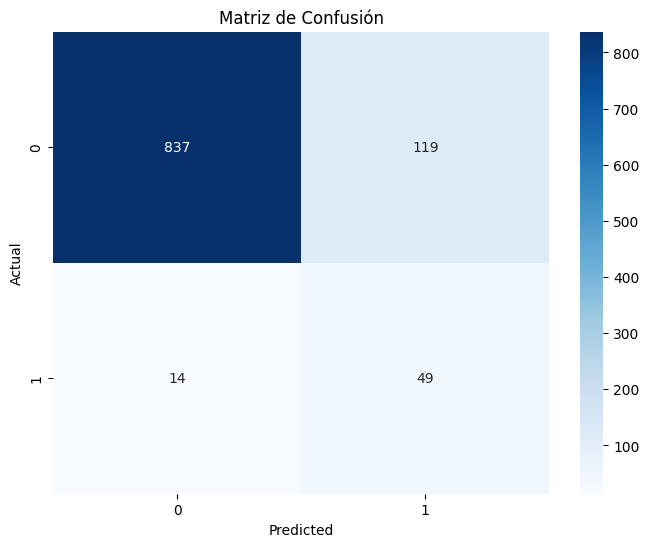

Precisión: 0.2916666666666667
Sensibilidad (Recall): 0.7777777777777778
Puntaje F1: 0.42424242424242425


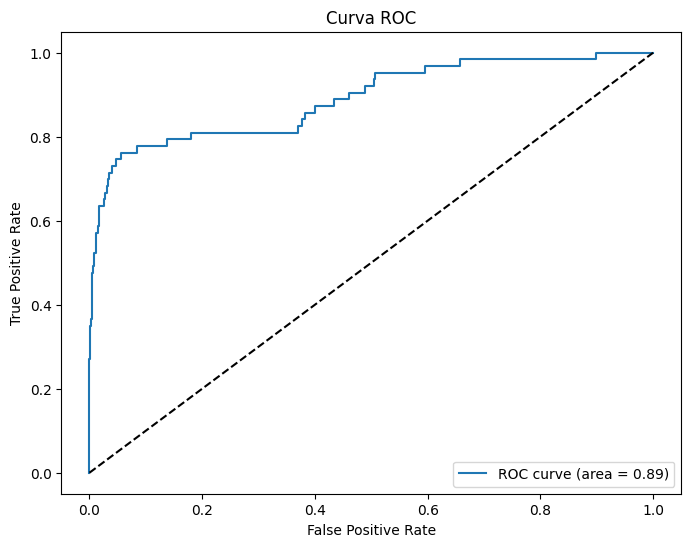

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB


# Paso 6: Ajuste del modelo
nb_model=MultinomialNB()
#model=MultinomialNB(fit_prior=False).fit(X_train_2009, y_train_2009) #ajustamos el modelo
nb_model.fit(X_train_2009, y_train_2009)  # Ajustar el modelo utilizando el conjunto de entrenamiento

# Paso 7: Validación del modelo en el conjunto de entrenamiento
y_pred_train = nb_model.predict(X_train_2009)  # Predecir en el conjunto de entrenamiento
accuracy_train = accuracy_score(y_train_2009, y_pred_train)  # Calcular precisión en el conjunto de entrenamiento
print("Accuracy en el conjunto de entrenamiento:", accuracy_train)

# Paso 8: Validación del modelo en el conjunto de prueba
y_pred_test_2010 = nb_model.predict(X_test_2010)  # Predecir en el conjunto de prueba
accuracy_test = accuracy_score(y_test_2010, y_pred_test_2010)  # Calcular precisión en el conjunto de prueba
print("Accuracy en el conjunto de prueba:", accuracy_test)



# Evaluación adicional del modelo
print("Reporte de clasificación en el conjunto de prueba (2010):")
print(classification_report(y_test_2010, y_pred_test_2010))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test_2010, y_pred_test_2010)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Precisión, Sensibilidad y Puntaje F1
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_2010, y_pred_test_2010, average='binary')
print("Precisión:", precision)
print("Sensibilidad (Recall):", recall)
print("Puntaje F1:", f1_score)

# Curva ROC y Área bajo la curva (AUC)
y_probs = nb_model.predict_proba(X_test_2010)[:, 1]  # Probabilidades de pertenecer a la clase positiva
fpr, tpr, thresholds = roc_curve(y_test_2010, y_probs)
auc_score = roc_auc_score(y_test_2010, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Línea base
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()